In [32]:
# Data Preprocessing
# data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

# data visualization
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sn

from sklearn.preprocessing import LabelEncoder, StandardScaler

df = pd.read_csv("CPET_post_EDA.csv")
df

Class sex  age        BMI  MaxVO2_EST  MaxO2_EST  \
0           CardiacLim   F   40  35.915381    2.319521   0.010556   
1           CardiacLim   M   69  35.057157    2.657210   0.013601   
2              Healthy   F   16  19.135218    1.444581   0.010300   
3              Healthy   M   17  19.358400    2.293821   0.015833   
4              Healthy   F   15  20.582507    1.933529   0.010300   
5              Healthy   M   15  22.954812    2.634672   0.015833   
6              Healthy   F   40  22.832008    1.789631   0.010200   
7              Healthy   M   78  33.028599    2.488961   0.013601   
8    MuscleSkeletalLim   F   65  31.976006    1.645164   0.010926   
9              Healthy   M   19  25.264615    3.743198   0.017667   
10             Healthy   M   21  21.895341    3.470684   0.015833   
11             Healthy   M   48  29.055854    2.706314   0.015567   
12             Healthy   M   77  31.573320    2.026836   0.013601   
13             Healthy   F   70  26.582856    1.238064   0.010926   
14             Healthy   F   52  28.613940    1.722167   0.010646   
15             Healthy   F   59  33.363129    1.843189   0.010769   
16             Healthy   M   68  26.631674    2.062709   0.013601   
17             Healthy   M   53  24.878149    2.795926   0.015000   
18             Healthy   F   60  28.742331    1.524776   0.010769   
19             Healthy   M   70  27.236309    2.310707   0.013601   
20             Healthy   F   58  27.195374    1.714599   0.010769   
21             Healthy   M   62  29.677814    2.644298   0.014567   
22             Healthy   F   53  25.595430    1.652594   0.010646   
23             Healthy   M   64  37.840130    2.868150   0.013601   
24             Healthy   F   65  29.963195    1.601083   0.010926   
25             Healthy   M   50  28.212194    2.905198   0.015567   
26             Healthy   M   55  28.860006    2.645425   0.014567   
27             Healthy   F   56  27.171312    1.687419   0.010769   
28             Healthy   M   63  33.487768    3.113011   0.014567   
29             Healthy   F   49  25.979950    1.930416   0.010646   
30             Healthy   F   51  33.963778    1.979776   0.010646   
31             Healthy   M   45  31.544300    3.203055   0.015567   
32             Healthy   M   66  26.216102    2.163636   0.013601   
33          CardiacLim   F   66  40.391960    2.117118   0.010926   
34          CardiacLim   M   79  27.569731    2.107373   0.013601   
35          CardiacLim   M   60  37.516976    3.737304   0.014567   
36          CardiacLim   M   57  36.697531    3.351173   0.014567   
37          CardiacLim   M   80  39.025694    2.882215   0.013601   
38          CardiacLim   M   73  21.016405    1.843775   0.014301   
39          CardiacLim   M   85  30.195312    1.907493   0.013601   
40          CardiacLim   M   70  32.805922    2.230756   0.013601   
41          CardiacLim   M   56  31.674964    2.671919   0.014567   
42          CardiacLim   M   83  36.319289    2.682336   0.013601   
43          CardiacLim   M   77  32.491349    2.317123   0.013601   
44          CardiacLim   F   56  37.612535    1.920334   0.010769   
45          CardiacLim   M   76  33.210219    2.684803   0.013601   
46             Healthy   F   57  32.348567    2.114798   0.010769   
47             Healthy   M   54  31.574905    3.012955   0.014567   
48             Healthy   F   61  28.796329    1.608749   0.010769   
49             Healthy   F   53  36.160646    2.230568   0.010646   
50             Healthy   F   52  46.296296    2.855785   0.010646   
51             Healthy   F   58  38.484987    2.231918   0.010769   
52             Healthy   F   57  34.681131    1.865088   0.010769   
53             Healthy   F   50  39.375574    2.519672   0.010646   
54             Healthy   F   67  39.480800    2.361789   0.010926   
55             Healthy   F   67  39.480800    2.361789   0.010926   
56             Healthy   F   60  32.070312    1.814262   0.010769   
57             

In [33]:
class_group = df.groupby("Class")

class_group_size = class_group.size()
class_group_size

Class
CardiacLim           51
Healthy              95
MuscleSkeletalLim    45
PulmonaryLim         26
dtype: int64

In [34]:
categorical_cols = df.columns
categorical_cols

Index(['Class', 'sex', 'age', 'BMI', 'MaxVO2_EST', 'MaxO2_EST',
       'PredictedMaxHR', 'PeakHeartRate', 'MeanHeartRate', 'MinHeartRate',
       ...
       '75_to_100_VESlope', '75_to_100_RERSlope', '75_to_100_RRSlope',
       '75_to_100_O2Slope', '75_to_100_VEVCO2Slope', '75_to_100_VEVO2Slope',
       'VTTime', 'VO2atVT', 'PercentTimeAfterVT', 'VO2vsPeakVO2atVT'],
      dtype='object', length=110)

In [35]:
# Recoding categorical columns

number = LabelEncoder()

for col in categorical_cols:
    df[col] = number.fit_transform(df[col].astype(str))
    
df

Class  sex  age  BMI  MaxVO2_EST  MaxO2_EST  PredictedMaxHR  \
0        0    0   19  183         120          5              43   
1        0    1   48  180         151          9              14   
2        1    0    1    5          14          4              61   
3        1    1    2    7         112         16              60   
4        1    0    0   17          69          4              62   
5        1    1    0   44         145         16              62   
6        1    0   19   41          50          3              43   
7        1    1   57  167         136          9               5   
8        2    0   44  157          35          8              18   
9        1    1    4   64         198         18              58   
10       1    1    6   32         194         16              56   
11       1    1   27  120         158         15              35   
12       1    1   56  150          80          9               6   
13       1    0   49   83           4          8              13   
14       1    0   31  115          43          6              31   
15       1    0   38  172          55          7              24   
16       1    1   47   85          82          9              15   
17       1    1   32   59         163         13              30   
18       1    0   39  117          20          7              23   
19       1    1   49   99         116          9              13   
20       1    0   37   98          42          7              25   
21       1    1   41  123         147         11              21   
22       1    0   32   67          36          6              30   
23       1    1   43  194         167          9              19   
24       1    0   44  128          28          8              18   
25       1    1   29  110         171         15              33   
26       1    1   34  119         148         11              28   
27       1    0   35   96          39          7              27   
28       1    1   42  173         186         11              20   
29       1    0   28   76          67          6              34   
30       1    0   30  175          74          6              32   
31       1    1   24  149         188         15              38   
32       1    1   45   78          92          9              17   
33       0    0   45  200          88          8              17   
34       0    1   58  104          85          9               4   
35       0    1   39  192         197         11              23   
36       0    1   36  187         192         11              26   
37       0    1   59  196         170          9               3   
38       0    1   52   22          56         10              10   
39       0    1   61  131          64          9               1   
40       0    1   49  165         104          9              13   
41       0    1   35  154         153         11              27   
42       0    1   60  186         154          9               2   
43       0    1   56  162         119          9               6   
44       0    0   35  193          65          7              27   
45       0    1   55  170         155          9               7   
46       1    0   36  161          87          7              26   
47       1    1   33  151         179         11              29   
48       1    0   40  118          30          7              22   
49       1    0   32  185         103          6              30   
50       1    0   31  203         166          6              31   
51       1    0   37  195         105          7              25   
52       1    0   36  179          58          7              26   
53       1    0   29  198         138          6              33   
54       1    0   46  199         124          8              16   
55       1    0   46  199         124          8              16   
56       1    0   39  159          52          7              23   
57       1    0   46  161          70          8             

In [36]:
class_group = df.groupby("Class")

class_group_size = class_group.size()
class_group_size


# 0 - CardiacLim
# 1 - Healthy
# 2 - MuscleSkeletalLim
# 3 - PulmonaryLim

Class
0    51
1    95
2    45
3    26
dtype: int64

In [37]:
# Scaling the columns

orig_cols = list(df.columns)

transform = StandardScaler()

df_transformed = transform.fit_transform(df)

df_transformed = pd.DataFrame(df_transformed)

df_transformed.columns = orig_cols

df_transformed["Class"] = df["Class"]

df = df_transformed

df

Class       sex       age       BMI  MaxVO2_EST  MaxO2_EST  \
0        0 -1.375984 -1.100080  1.375565    0.348192  -1.127342   
1        0  0.726752  0.990770  1.325520    0.889511  -0.184632   
2        1 -1.375984 -2.397849 -1.593730   -1.502770  -1.363020   
3        1  0.726752 -2.325750 -1.560367    0.208497   1.465110   
4        1 -1.375984 -2.469947 -1.393553   -0.542365  -1.363020   
5        1  0.726752 -2.469947 -0.943154    0.784740   1.465110   
6        1 -1.375984 -1.100080 -0.993198   -0.874141  -1.598697   
7        1  0.726752  1.639654  1.108662    0.627583  -0.184632   
8        2 -1.375984  0.702377  0.941847   -1.136070  -0.420310   
9        1  0.726752 -2.181554 -0.609526    1.710221   1.936465   
10       1  0.726752 -2.037357 -1.143331    1.640373   1.465110   
11       1  0.726752 -0.523294  0.324634    1.011745   1.229433   
12       1  0.726752  1.567556  0.825077   -0.350284  -0.184632   
13       1 -1.375984  1.062868 -0.292578   -1.677389  -0.420310   
14       1 -1.375984 -0.234901  0.241227   -0.996375  -0.891665   
15       1 -1.375984  0.269787  1.192069   -0.786832  -0.655987   
16       1  0.726752  0.918671 -0.259216   -0.315360  -0.184632   
17       1  0.726752 -0.162803 -0.692933    1.099054   0.758078   
18       1 -1.375984  0.341885  0.274590   -1.397999  -0.655987   
19       1  0.726752  1.062868 -0.025676    0.278344  -0.184632   
20       1 -1.375984  0.197689 -0.042357   -1.013837  -0.655987   
21       1  0.726752  0.486082  0.374679    0.819664   0.286723   
22       1 -1.375984 -0.162803 -0.559481   -1.118608  -0.891665   
23       1  0.726752  0.630278  1.559060    1.168902  -0.184632   
24       1 -1.375984  0.702377  0.458086   -1.258303  -0.420310   
25       1  0.726752 -0.379097  0.157820    1.238749   1.229433   
26       1  0.726752 -0.018606  0.307953    0.837125   0.286723   
27       1 -1.375984  0.053492 -0.075720   -1.066222  -0.655987   
28       1  0.726752  0.558180  1.208750    1.500678   0.286723   
29       1 -1.375984 -0.451196 -0.409348   -0.577289  -0.891665   
30       1 -1.375984 -0.306999  1.242113   -0.455056  -0.891665   
31       1  0.726752 -0.739589  0.808396    1.535602   1.229433   
32       1  0.726752  0.774475 -0.375986   -0.140741  -0.184632   
33       0 -1.375984  0.774475  1.659149   -0.210589  -0.420310   
34       0  0.726752  1.711752  0.057732   -0.262975  -0.184632   
35       0  0.726752  0.341885  1.525697    1.692759   0.286723   
36       0  0.726752  0.125591  1.442290    1.605449   0.286723   
37       0  0.726752  1.783850  1.592423    1.221287  -0.184632   
38       0  0.726752  1.279163 -1.310146   -0.769370   0.051045   
39       0  0.726752  1.928047  0.508130   -0.629675  -0.184632   
40       0  0.726752  1.062868  1.075299    0.068802  -0.184632   
41       0  0.726752  0.053492  0.891803    0.924435   0.286723   
42       0  0.726752  1.855949  1.425609    0.941897  -0.184632   
43       0  0.726752  1.567556  1.025254    0.330730  -0.184632   
44       0 -1.375984  0.053492  1.542379   -0.612213  -0.655987   
45       0  0.726752  1.495457  1.158706    0.959359  -0.184632   
46       1 -1.375984  0.125591  1.008573   -0.228051  -0.655987   
47       1  0.726752 -0.090704  0.841759    1.378445   0.286723   
48       1 -1.375984  0.413984  0.291272   -1.223380  -0.655987   
49       1 -1.375984 -0.162803  1.408927    0.051340  -0.891665   
50       1 -1.375984 -0.234901  1.709193    1.151440  -0.891665   
51       1 -1.375984  0.197689  1.575742    0.086263  -0.655987   
52       1 -1.375984  0.125591  1.308839   -0.734446  -0.655987   
53       1 -1.375984 -0.379097  1.625786    0.662506  -0.891665   
54       1 -1.375984  0.846573  1.642467    0.418040  -0.420310   
55       1 -1.375984  0.846573  1.642467    0.418040  -0.420310   
56       1 -1.375984  0.341885  0.975210   -0.839218  -0.655987   
57       1 -1.375984  0.846573  1.008573   -0.524903  -0.420310   
58       1 -1.375984  0.990770  1.675830    0.243421

In [38]:
# Feature Selection Using Correlation

    # Selecting features whose correlation with class > 0.2
target = "Class"
corr_threshold = 0.2

cor = df.corr()
cor_target = abs(cor[target])
relevant_features = cor_target[cor_target >= corr_threshold]

corr_columns_obj = relevant_features.index
corr_columns_list = []

for col in corr_columns_obj:
    corr_columns_list.append(col)
        

corr_columns_list

#Add new features
additional_features = []

for feature in additional_features:
    corr_columns_list.append(feature)

In [56]:
# Feature Selection Using Information Gain
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
%matplotlib inline

y = df["Class"]
x = df.drop('Class', axis=1)

importances = mutual_info_classif(x,y)
feat_importances=pd.Series(importances)
feat_importances.index = x.columns
feat_importances.sort_values(ascending=False)
sel_10_cols = SelectKBest(mutual_info_classif, k=10)
sel_10_cols.fit(x,y)
#x.columns[sel_10_cols.get_support()]

df_IG = df[x.columns[sel_10_cols.get_support()]]
df_IG.insert(0, 'Class', df['Class'])
df_IG

Class  LowestVE/VCO2  PeakVO2Real  DiffPeakVO2  DiffPercentPeakVO2  \
0        0      -1.437322     0.119931    -0.729516           -0.022886   
1        0      -0.079235    -0.256723     0.234680           -0.697917   
2        1      -0.617345     1.500993     1.648835            1.728980   
3        1      -0.053610     1.734159     1.713115            1.712908   
4        1      -0.309853     1.483057     1.632765            1.680764   
..     ...            ...          ...          ...                 ...   
212      2       0.766367    -0.507825     0.459660           -1.003288   
213      2       0.996986    -1.099709     0.523939           -1.485453   
214      2       0.253881    -0.346402    -1.018775            0.057475   
215      2       1.227604    -1.458426     0.057911           -1.437237   
216      2       0.868864    -1.010029    -0.809866           -0.312185   

      MeanVO2   PeakVO2  MeanVCO2  O2PulseDiff  O2PulsePercent  \
0   -0.399094  0.119931 -0.682272     0.830116        0.941863   
1   -0.111746 -0.256723 -0.376875    -0.718370       -0.686442   
2    1.436739  1.500993  1.423357     1.404812        1.564450   
3    1.676196  1.734159  1.680533     1.484631        1.452703   
4    1.484631  1.483057  1.551945     1.468667        1.596377   
..        ...       ...       ...          ...             ...   
212 -0.638551 -0.507825 -0.730492    -0.957826       -0.335239   
213 -1.293065 -1.099709 -1.502021    -0.638551       -0.734333   
214 -0.159638 -0.346402 -0.135773    -1.596377        0.191565   
215 -1.484631 -1.458426 -1.566315    -0.303312       -0.989754   
216 -0.941863 -1.010029 -1.019815    -1.181319       -0.287348   

     VO2vsPeakVO2atVT  
0            0.654429  
1           -0.066439  
2            1.727722  
3            1.711702  
4            1.679664  
..                ...  
212         -1.572253  
213         -1.444099  
214          0.334043  
215         -1.075655  
216          0.318024  

[217 rows x 11 columns]

In [26]:
# Dataframes with only the selected columns

df = df[corr_columns_list].copy()
df

Class  LowestVE/VCO2  PeakVE/VCO2  MeanVE/VCO2  DiffPercentPeakVO2  \
0        0      -1.437322     1.533367    -0.147972           -0.022886   
1        0      -0.079235     1.232517    -0.293120           -0.697917   
2        1      -0.617345     0.876966    -0.422140            1.728980   
3        1      -0.053610    -0.052936    -0.067334            1.712908   
4        1      -0.309853     0.439365    -0.212482            1.680764   
..     ...            ...          ...          ...                 ...   
212      2       0.766367    -0.463186     0.513257           -1.003288   
213      2       0.996986     0.275265     1.077720           -1.485453   
214      2       0.253881    -0.928137    -0.486650            0.057475   
215      2       1.227604     1.423967     1.448654           -1.437237   
216      2       0.868864    -0.134986     0.642277           -0.312185   

      MeanVO2  MeanVCO2  PeakVCO2  MeanO2Pulse  MaxO2Pulse  O2PulsePercent  \
0   -0.399094 -0.682272 -0.072394    -0.383131    0.189349        0.941863   
1   -0.111746 -0.376875 -0.299815    -0.415058   -0.612227       -0.686442   
2    1.436739  1.423357  1.519551     0.957826    1.103147        1.564450   
3    1.676196  1.680533  1.711983     1.548486    1.552029        1.452703   
4    1.484631  1.551945  1.432081     1.117464    1.247430        1.596377   
..        ...       ...       ...          ...         ...             ...   
212 -0.638551 -0.730492 -1.087040    -0.638551    0.093160       -0.335239   
213 -1.293065 -1.502021 -1.366943    -0.750297   -0.676353       -0.734333   
214 -0.159638 -0.135773 -0.387284    -0.399094   -0.435880        0.191565   
215 -1.484631 -1.566315 -1.559375    -0.462949   -0.788574       -0.989754   
216 -0.941863 -1.019815 -0.982077    -0.798189   -0.852700       -0.287348   

     second_half_VESlope  0_to_25_VO2Slope  0_to_25_HRSlope  0_to_25_O2Slope  \
0              -0.383131         -0.300556         0.592106        -0.095783   
1               0.670478         -0.267041         0.455812        -0.079819   
2               0.941863          0.520567        -0.517723         0.015964   
3              -1.197283          1.727116        -0.167251         1.532522   
4               1.340957          0.805447         1.760348         0.526804   
..                   ...               ...              ...              ...   
212            -0.638551         -1.071406        -1.549670        -0.957826   
213            -0.367167         -1.037891        -1.101844        -0.846080   
214            -1.053609         -0.535163        -1.101844        -0.223493   
215            -1.612341         -0.149737        -0.965549         0.446986   
216            -0.941863         -1.306013        -0.284075        -0.973790   

     75_to_100_VESlope       BMI  
0             0.319275  1.375565  
1             1.309029  1.325520  
2             1.628305 -1.593730  
3            -0.973790 -1.560367  
4            -1.596377 -1.393553  
..                 ...       ...  
212          -1.676196  1.058617  
213           1.101500  0.641582  
214          -0.191565  1.458972  
215          -1.548486 -1.276783  
216          -0.399094  0.991892  

[217 rows x 17 columns]

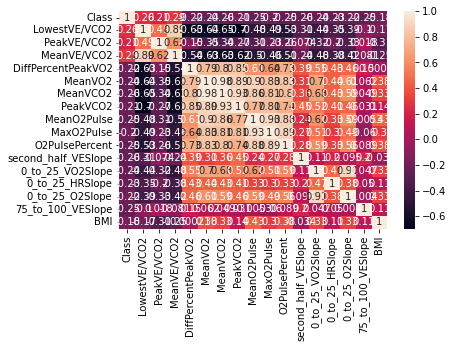

In [27]:
# Relationships of variables

corr_matrix = df.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [28]:
# Exporting dataframe into CSV (Correlation)

df.to_csv('CPET_processed.csv', index=False)
df

Class  LowestVE/VCO2  PeakVE/VCO2  MeanVE/VCO2  DiffPercentPeakVO2  \
0        0      -1.437322     1.533367    -0.147972           -0.022886   
1        0      -0.079235     1.232517    -0.293120           -0.697917   
2        1      -0.617345     0.876966    -0.422140            1.728980   
3        1      -0.053610    -0.052936    -0.067334            1.712908   
4        1      -0.309853     0.439365    -0.212482            1.680764   
..     ...            ...          ...          ...                 ...   
212      2       0.766367    -0.463186     0.513257           -1.003288   
213      2       0.996986     0.275265     1.077720           -1.485453   
214      2       0.253881    -0.928137    -0.486650            0.057475   
215      2       1.227604     1.423967     1.448654           -1.437237   
216      2       0.868864    -0.134986     0.642277           -0.312185   

      MeanVO2  MeanVCO2  PeakVCO2  MeanO2Pulse  MaxO2Pulse  O2PulsePercent  \
0   -0.399094 -0.682272 -0.072394    -0.383131    0.189349        0.941863   
1   -0.111746 -0.376875 -0.299815    -0.415058   -0.612227       -0.686442   
2    1.436739  1.423357  1.519551     0.957826    1.103147        1.564450   
3    1.676196  1.680533  1.711983     1.548486    1.552029        1.452703   
4    1.484631  1.551945  1.432081     1.117464    1.247430        1.596377   
..        ...       ...       ...          ...         ...             ...   
212 -0.638551 -0.730492 -1.087040    -0.638551    0.093160       -0.335239   
213 -1.293065 -1.502021 -1.366943    -0.750297   -0.676353       -0.734333   
214 -0.159638 -0.135773 -0.387284    -0.399094   -0.435880        0.191565   
215 -1.484631 -1.566315 -1.559375    -0.462949   -0.788574       -0.989754   
216 -0.941863 -1.019815 -0.982077    -0.798189   -0.852700       -0.287348   

     second_half_VESlope  0_to_25_VO2Slope  0_to_25_HRSlope  0_to_25_O2Slope  \
0              -0.383131         -0.300556         0.592106        -0.095783   
1               0.670478         -0.267041         0.455812        -0.079819   
2               0.941863          0.520567        -0.517723         0.015964   
3              -1.197283          1.727116        -0.167251         1.532522   
4               1.340957          0.805447         1.760348         0.526804   
..                   ...               ...              ...              ...   
212            -0.638551         -1.071406        -1.549670        -0.957826   
213            -0.367167         -1.037891        -1.101844        -0.846080   
214            -1.053609         -0.535163        -1.101844        -0.223493   
215            -1.612341         -0.149737        -0.965549         0.446986   
216            -0.941863         -1.306013        -0.284075        -0.973790   

     75_to_100_VESlope       BMI  
0             0.319275  1.375565  
1             1.309029  1.325520  
2             1.628305 -1.593730  
3            -0.973790 -1.560367  
4            -1.596377 -1.393553  
..                 ...       ...  
212          -1.676196  1.058617  
213           1.101500  0.641582  
214          -0.191565  1.458972  
215          -1.548486 -1.276783  
216          -0.399094  0.991892  

[217 rows x 17 columns]

In [57]:
# Exporting dataframe into CSV (Fisher)
df_IG.to_csv('CPET_processed_IG.csv', index=False)
df_IG

Class  LowestVE/VCO2  PeakVO2Real  DiffPeakVO2  DiffPercentPeakVO2  \
0        0      -1.437322     0.119931    -0.729516           -0.022886   
1        0      -0.079235    -0.256723     0.234680           -0.697917   
2        1      -0.617345     1.500993     1.648835            1.728980   
3        1      -0.053610     1.734159     1.713115            1.712908   
4        1      -0.309853     1.483057     1.632765            1.680764   
..     ...            ...          ...          ...                 ...   
212      2       0.766367    -0.507825     0.459660           -1.003288   
213      2       0.996986    -1.099709     0.523939           -1.485453   
214      2       0.253881    -0.346402    -1.018775            0.057475   
215      2       1.227604    -1.458426     0.057911           -1.437237   
216      2       0.868864    -1.010029    -0.809866           -0.312185   

      MeanVO2   PeakVO2  MeanVCO2  O2PulseDiff  O2PulsePercent  \
0   -0.399094  0.119931 -0.682272     0.830116        0.941863   
1   -0.111746 -0.256723 -0.376875    -0.718370       -0.686442   
2    1.436739  1.500993  1.423357     1.404812        1.564450   
3    1.676196  1.734159  1.680533     1.484631        1.452703   
4    1.484631  1.483057  1.551945     1.468667        1.596377   
..        ...       ...       ...          ...             ...   
212 -0.638551 -0.507825 -0.730492    -0.957826       -0.335239   
213 -1.293065 -1.099709 -1.502021    -0.638551       -0.734333   
214 -0.159638 -0.346402 -0.135773    -1.596377        0.191565   
215 -1.484631 -1.458426 -1.566315    -0.303312       -0.989754   
216 -0.941863 -1.010029 -1.019815    -1.181319       -0.287348   

     VO2vsPeakVO2atVT  
0            0.654429  
1           -0.066439  
2            1.727722  
3            1.711702  
4            1.679664  
..                ...  
212         -1.572253  
213         -1.444099  
214          0.334043  
215         -1.075655  
216          0.318024  

[217 rows x 11 columns]